In [24]:
import time
import openfermion
import warnings
warnings.filterwarnings("ignore")
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import scipy


util_dir = "/home/jwdesroches/python/Ga2QuAMES/symmetry/helper_funcs/"
sys.path.append(util_dir)

from helper_functions import *
from XBK_method import *
from utils import *
from neal import SimulatedAnnealingSampler
from pyscf import gto, scf, fci
plt.rcParams.update({'font.size': 16})

In [25]:
def get_ising_hamiltonian(mol_name, basis_set, geom, charge, spin, r_value, sym_case, bond_length):
    
    if sym_case == "no":
        qubit_hamiltonian = get_unsimplified_hamiltonian(atom = geom, basis = basis_set, charge = charge, spin = spin)
    elif sym_case == "yes":
        qubit_hamiltonian = get_simplified_hamiltonian(atom = geom, basis = basis_set, charge = charge, spin = spin)
        
    N = openfermion.utils.count_qubits(qubit_hamiltonian)
    
    ising_energies = []
    ising_ground_states = []

    if r_value == 1:
        true_ising_hamiltonian = XBK_transform(qubit_hamiltonian, 1, 1)
        return true_ising_hamiltonian
        
    else:
        ising_energies = []
        ising_ground_states = []
        
        sumBsqs = []
        ising_Hs, ising_Cs = [],[]
        for p in range(int(math.ceil(r_value/2+1))):
            ising_H = XBK_transform(qubit_hamiltonian, r_value, p)
            ising_C = construct_C(N, r_value, p)
            ising_Hs += [ising_H]
            ising_Cs += [ising_C]
        
            ising_C_matrix = openfermion.linalg.get_sparse_operator(ising_C)
        
            if r_value*N == 1:
                
                ising_energy, ising_gs = np.linalg.eigh(openfermion.linalg.get_sparse_operator(ising_H).toarray())
                ising_energy = ising_energy[0]
                
            else:
                
                sparse_operator = openfermion.linalg.get_sparse_operator(ising_H)
                ising_energy, ising_gs = openfermion.linalg.get_ground_state(sparse_operator)
            
                sumBsq = round(np.linalg.norm(ising_C_matrix @ ising_gs))
                sumBsqs += [sumBsq]
                
                if sumBsq == 0:
                    pass
                ising_energy = ising_energy/sumBsq
                ising_energies.append(ising_energy)
                ising_ground_states.append(ising_gs)
                
        ising_energies = np.array(ising_energies)
        index = int(np.argmin(ising_energies))

        true_ising_hamiltonian = ising_Hs[index]
        sumBsq = sumBsqs[index]

        return true_ising_hamiltonian, sumBsq
  

In [26]:
mol_name = "He2"
basis_set = "sto-3g"
charge = 0
spin = 0

In [27]:
fci_bond_lengths = np.linspace(0.3, 5.0, 100)
fci_energies = []
for bond_length in fci_bond_lengths:
    mol = gto.Mole()
    mol.build(atom=return_geometry(mol_name, bond_length), basis=basis_set, unit="angstrom")
    mf = scf.RHF(mol)
    mf.kernel()

    cisolver = fci.FCI(mf)
    fci_energy = cisolver.kernel()[0]
    fci_energies.append(fci_energy)

converged SCF energy = -0.948047682295938
converged SCF energy = -2.00662991831623
converged SCF energy = -2.79404378707511
converged SCF energy = -3.39132359242908
converged SCF energy = -3.85038065162339
converged SCF energy = -4.20653786155616
converged SCF energy = -4.48502744445536
converged SCF energy = -4.70443132233464
converged SCF energy = -4.87860044319067
converged SCF energy = -5.01786849957655
converged SCF energy = -5.12993709458442
converged SCF energy = -5.22056835881969
converged SCF energy = -5.29412179349881
converged SCF energy = -5.35395104232988
converged SCF energy = -5.40268256333577
converged SCF energy = -5.4424048502435
converged SCF energy = -5.47479633147829
converged SCF energy = -5.50121423833143
converged SCF energy = -5.5227594766193
converged SCF energy = -5.54032644837093
converged SCF energy = -5.55464269660533
converged SCF energy = -5.56630095698106
converged SCF energy = -5.57578510317743
converged SCF energy = -5.58349102279339
converged SCF ene

In [28]:
r_value = 3

num_eig_unsimp = 8
num_eig_simp = 2

lower_bound = -6
upper_bound = 3

bond_lengths = np.around(np.arange(0.2, 5.0, 0.1), 2)

bond lenght: 0.2
bond lenght: 0.3
bond lenght: 0.4
bond lenght: 0.5
bond lenght: 0.6
bond lenght: 0.7
bond lenght: 0.8
bond lenght: 0.9
bond lenght: 1.0
bond lenght: 1.1
bond lenght: 1.2
bond lenght: 1.3
bond lenght: 1.4
bond lenght: 1.5
bond lenght: 1.6
bond lenght: 1.7
bond lenght: 1.8
bond lenght: 1.9
bond lenght: 2.0
bond lenght: 2.1
bond lenght: 2.2
bond lenght: 2.3
bond lenght: 2.4
bond lenght: 2.5
bond lenght: 2.6
bond lenght: 2.7
bond lenght: 2.8
bond lenght: 2.9
bond lenght: 3.0
bond lenght: 3.1
bond lenght: 3.2
bond lenght: 3.3
bond lenght: 3.4
bond lenght: 3.5
bond lenght: 3.6
bond lenght: 3.7
bond lenght: 3.8
bond lenght: 3.9
bond lenght: 4.0
bond lenght: 4.1
bond lenght: 4.2
bond lenght: 4.3
bond lenght: 4.4
bond lenght: 4.5
bond lenght: 4.6
bond lenght: 4.7
bond lenght: 4.8
bond lenght: 4.9


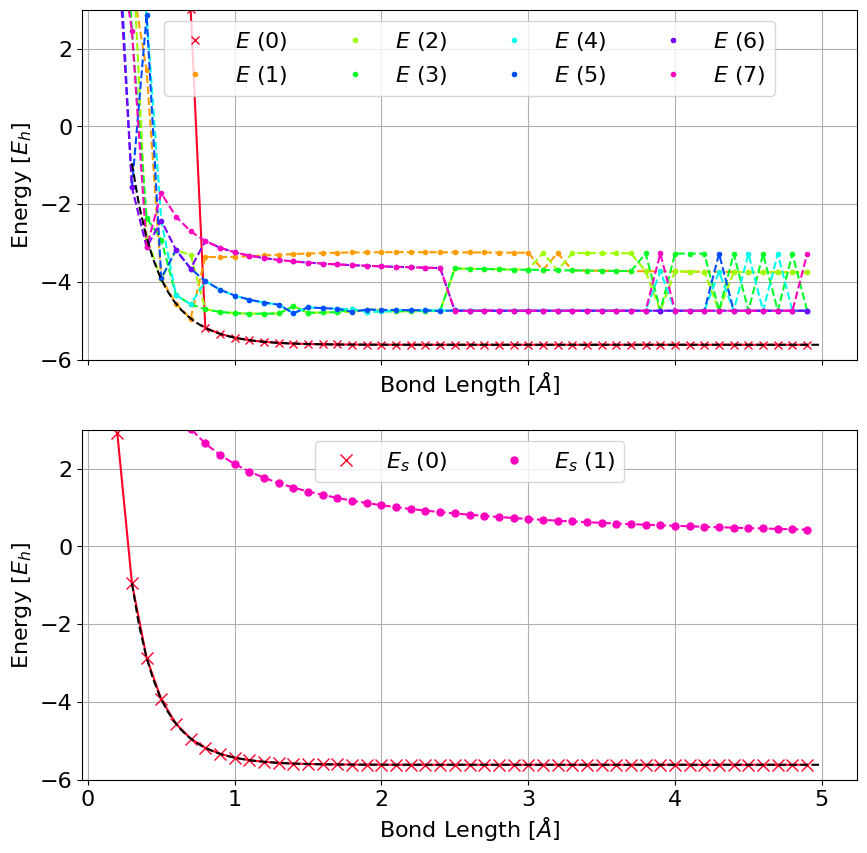

bond lenght: 0.2
bond lenght: 0.3
bond lenght: 0.4
bond lenght: 0.5
bond lenght: 0.6
bond lenght: 0.7
bond lenght: 0.8
bond lenght: 0.9
bond lenght: 1.0
bond lenght: 1.1
bond lenght: 1.2
bond lenght: 1.3
bond lenght: 1.4
bond lenght: 1.5
bond lenght: 1.6
bond lenght: 1.7
bond lenght: 1.8
bond lenght: 1.9
bond lenght: 2.0
bond lenght: 2.1
bond lenght: 2.2
bond lenght: 2.3
bond lenght: 2.4
bond lenght: 2.5
bond lenght: 2.6
bond lenght: 2.7
bond lenght: 2.8
bond lenght: 2.9
bond lenght: 3.0
bond lenght: 3.1
bond lenght: 3.2
bond lenght: 3.3
bond lenght: 3.4
bond lenght: 3.5
bond lenght: 3.6
bond lenght: 3.7
bond lenght: 3.8
bond lenght: 3.9
bond lenght: 4.0
bond lenght: 4.1
bond lenght: 4.2
bond lenght: 4.3
bond lenght: 4.4
bond lenght: 4.5
bond lenght: 4.6
bond lenght: 4.7
bond lenght: 4.8
bond lenght: 4.9


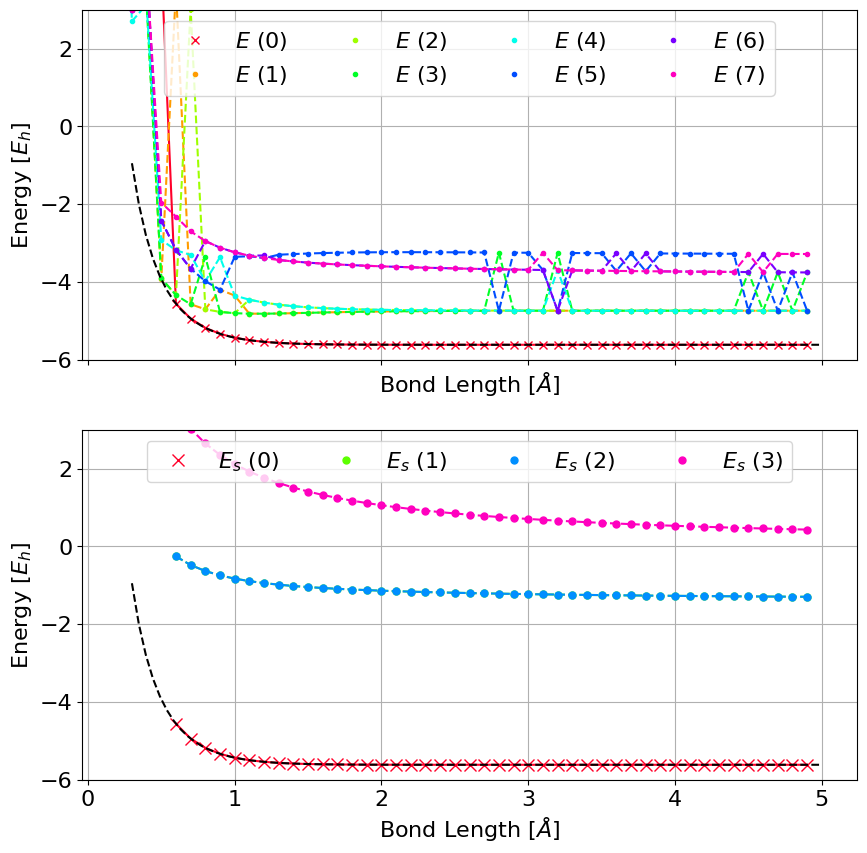

bond lenght: 0.2
bond lenght: 0.3
bond lenght: 0.4
bond lenght: 0.5
bond lenght: 0.6
bond lenght: 0.7
bond lenght: 0.8
bond lenght: 0.9
bond lenght: 1.0
bond lenght: 1.1
bond lenght: 1.2
bond lenght: 1.3
bond lenght: 1.4
bond lenght: 1.5
bond lenght: 1.6
bond lenght: 1.7
bond lenght: 1.8
bond lenght: 1.9
bond lenght: 2.0
bond lenght: 2.1
bond lenght: 2.2
bond lenght: 2.3
bond lenght: 2.4
bond lenght: 2.5
bond lenght: 2.6
bond lenght: 2.7
bond lenght: 2.8
bond lenght: 2.9
bond lenght: 3.0
bond lenght: 3.1
bond lenght: 3.2
bond lenght: 3.3
bond lenght: 3.4
bond lenght: 3.5
bond lenght: 3.6
bond lenght: 3.7
bond lenght: 3.8
bond lenght: 3.9
bond lenght: 4.0
bond lenght: 4.1
bond lenght: 4.2
bond lenght: 4.3
bond lenght: 4.4
bond lenght: 4.5
bond lenght: 4.6
bond lenght: 4.7
bond lenght: 4.8
bond lenght: 4.9


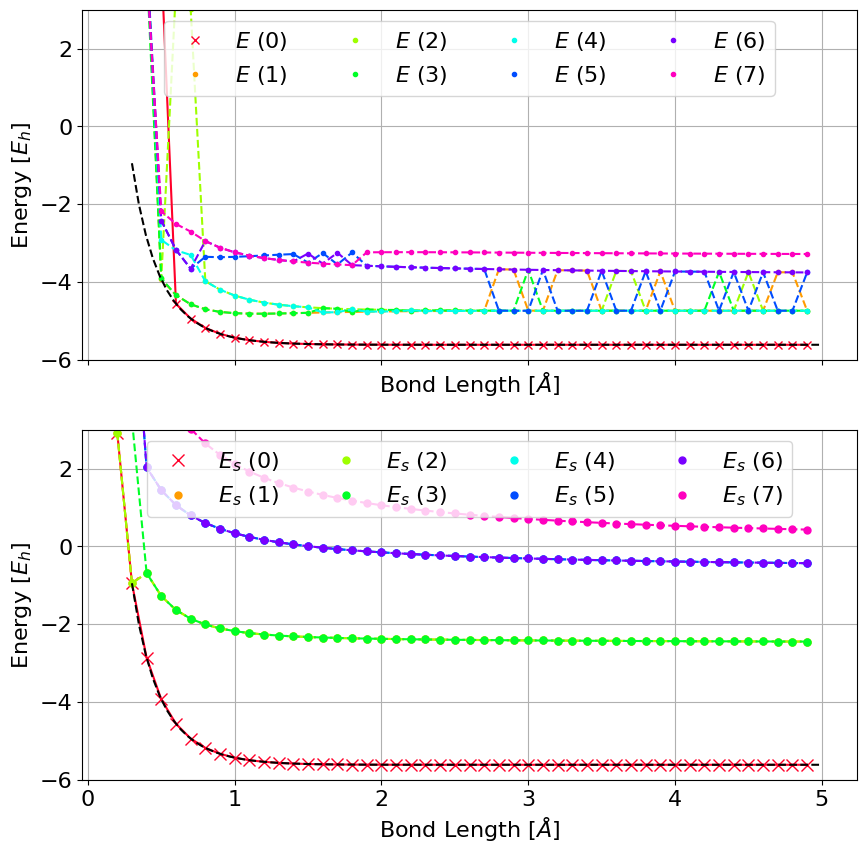

In [29]:
import scipy

for r_value in [1,2,3]:
    num_eig_simp = 2**r_value

    fig, (ax1,ax2) = plt.subplots(nrows = 2, figsize = (10,10), sharex=True, sharey=True)

    sym_case = "no"

    all_eigenvalues = []
    for bond_length in bond_lengths:
        geom = return_geometry(mol_name, bond_length)
        if r_value == 1:
            ising_hamiltonian = get_ising_hamiltonian(mol_name, basis_set, geom, charge, spin, r_value, sym_case, bond_length)
        else: 
            ising_hamiltonian, sumBsq = get_ising_hamiltonian(mol_name, basis_set, geom, charge, spin, r_value, sym_case, bond_length)
        
        ising_matrix = openfermion.linalg.get_sparse_operator(ising_hamiltonian)    
        eigenvalues, eigenvectors = scipy.sparse.linalg.eigsh(ising_matrix, k=num_eig_unsimp)
        
        if r_value != 1:
            eigenvalues = [E / sumBsq for E in eigenvalues]
        
        all_eigenvalues.append(eigenvalues)

    cmap = get_cmap("gist_rainbow", num_eig_unsimp)

    for i in range(num_eig_unsimp):
        if i == 0:
            ax1.plot(bond_lengths, [eigenvalues[i] for eigenvalues in all_eigenvalues], 'x', color=cmap(i), label = f"$E$ ({i})")
            ax1.plot(bond_lengths, [eigenvalues[i] for eigenvalues in all_eigenvalues], '-', color=cmap(i))

        else: 
            ax1.plot(bond_lengths, [eigenvalues[i] for eigenvalues in all_eigenvalues], '.', color=cmap(i), label = f"$E$ ({i})")
            ax1.plot(bond_lengths, [eigenvalues[i] for eigenvalues in all_eigenvalues], '--', color=cmap(i))

    ax1.plot(fci_bond_lengths, fci_energies, '--k')

    ax1.set_xlabel("Bond Length [$\AA$]")
    ax1.set_ylabel("Energy [$E_h$]")
    ax1.legend(loc = "upper center", ncols = num_eig_unsimp/2)
    ax1.set_ylim(lower_bound,upper_bound)
    ax1.grid()

    sym_case = "yes"
    all_eigenvalues = []
    for bond_length in bond_lengths:
        geom = return_geometry(mol_name, bond_length)
        
        if r_value == 1:
            ising_hamiltonian = get_ising_hamiltonian(mol_name, basis_set, geom, charge, spin, r_value, sym_case, bond_length)
        else: 
            ising_hamiltonian, sumBsq = get_ising_hamiltonian(mol_name, basis_set, geom, charge, spin, r_value, sym_case, bond_length)
        
        ising_matrix = openfermion.linalg.get_sparse_operator(ising_hamiltonian).todense()
        eigenvalues, eigenvectors = np.linalg.eigh(ising_matrix)
        
        if r_value != 1:
            eigenvalues = [E / sumBsq for E in eigenvalues]
        
        all_eigenvalues.append(eigenvalues)
        print(f"bond lenght: {bond_length}")

    cmap = get_cmap("gist_rainbow", num_eig_simp)

    for i in range(num_eig_simp):
        if i == 0:
            ax2.plot(bond_lengths, [eigenvalues[i] for eigenvalues in all_eigenvalues], 'x', markersize = 8, color=cmap(i), label = f"$E_s$ ({i})")
            ax2.plot(bond_lengths, [eigenvalues[i] for eigenvalues in all_eigenvalues], '-', color=cmap(i))

        else:
            ax2.plot(bond_lengths, [eigenvalues[i] for eigenvalues in all_eigenvalues], '.', markersize = 10, color=cmap(i), label = f"$E_s$ ({i})")
            ax2.plot(bond_lengths, [eigenvalues[i] for eigenvalues in all_eigenvalues], '--', color=cmap(i))

    ax2.plot(fci_bond_lengths, fci_energies, '--k')

    ax2.set_xlabel("Bond Length [$\AA$]")
    ax2.set_ylabel("Energy [$E_h$]")
    if num_eig_simp == 8:
        
        ax2.legend(loc = "upper center", ncols = num_eig_simp//2)
        
    else:
        ax2.legend(loc = "upper center", ncols = num_eig_simp)
    ax2.grid()
    ax2.set_ylim(lower_bound,upper_bound)
    plt.show()

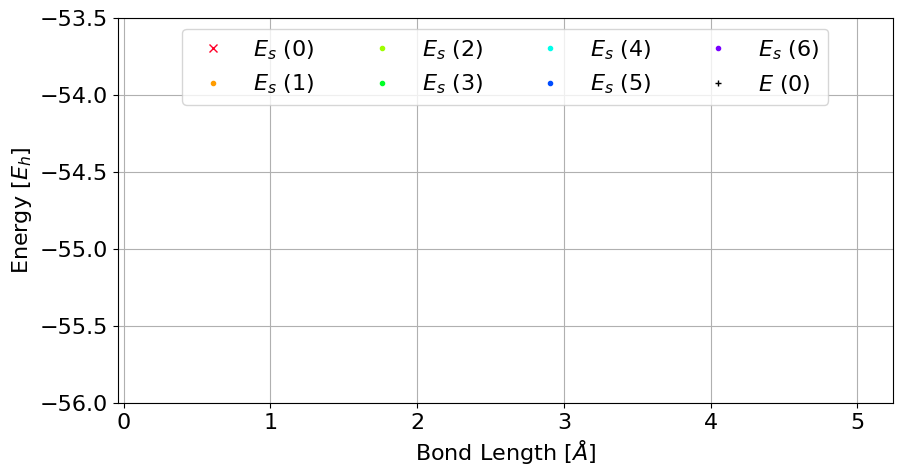

In [30]:
# overlaid no sym

import pandas as pd
df = pd.read_csv("extracted_data.csv")
df = df.dropna()

num_eig_simp=7

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(fci_bond_lengths, fci_energies, '--k')

for i in range(num_eig_simp):
    if i == 0:
        ax.plot(bond_lengths, [eigenvalues[i] for eigenvalues in all_eigenvalues], 'x', color=cmap(i), label = f"$E_s$ ({i})")
        ax.plot(bond_lengths, [eigenvalues[i] for eigenvalues in all_eigenvalues], '-', color=cmap(i))

    else:
        ax.plot(bond_lengths, [eigenvalues[i] for eigenvalues in all_eigenvalues], '.', color=cmap(i), label = f"$E_s$ ({i})")
        ax.plot(bond_lengths, [eigenvalues[i] for eigenvalues in all_eigenvalues], '--', color=cmap(i))

ax.plot(df["Bond Length"][(df["Molecule"] == mol_name) & (df["Basis Set"] == basis_set) & 
                        (df["Symmetry Case"] == "no") & (df["R value"] == r_value)], 
                    df["Ising Energy [Hartree]"][(df["Molecule"] == mol_name) & (df["Basis Set"] == basis_set) & 
                        (df["Symmetry Case"] == "no") & (df["R value"] == r_value)], "+k", markersize = 5, label=f"$E$ (0)")

ax.set_xlabel("Bond Length [$\AA$]")
ax.set_ylabel("Energy [$E_h$]")
ax.legend(loc = "upper center", ncols = (num_eig_simp+1)//2)
ax.grid()
ax.set_ylim(-56,-53.5)
plt.show()